<center><font size="12">HOUSE PRICE PREDICTION<font><center>

![Image](https://www.rd.com/wp-content/uploads/2017/10/Upside-Down-Houses-That-Will-Make-You-Look-Twice-courtesy-@nightrav3n-FT.jpg)

<font size="4">1. Imports.<font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import Image
from IPython.core.display import HTML 
import warnings; warnings.simplefilter('ignore')

%matplotlib inline



<font size="4">2. Loading the dataset ([here](https://www.kaggle.com/harlfoxem/housesalesprediction) link to the kaggle).<font>

In [2]:
data = pd.read_csv('file:///home/lagasz/kc_house_data.csv')

<font size="4">3. Checking what this dataset has inside.<font>

In [ ]:
data.head()

In [ ]:
data.shape


**Columns Descriptions:**

* id - unique ID for each home, 
* date- date when the home was sold,
* price - sales price,
* bedrooms - number of bedrooms,
* bathrooms - number of bathrooms, where .5 accounts for a room with a toilet but no shower,
* sqft_living - square footage of the apartments interior living space,
* sqft_lot - square footage of the land space,
* floors - number of floors,
* waterfront - a dummy variable for whether the apartment was overlooking the waterfront or not,
* view - an index from 0 to 4 of how good the view of the property was,
* condition - an index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average      level of construction and design, and 11-13 have a high quality level of construction and design,
* sqft_above - the square footage of the interior housing space that is above ground level,
* sqft_basement - the square footage of the interior housing space that is below ground level,
* yr_built - the year the house was initially built,
* yr_renovated - the year of the house’s last renovation,
* zipcode - what zipcode area the house is in,
* lat - lattitude,
* long - longitude,
* sqft_living15 - the square footage of interior housing living space for the nearest 15 neighbors,
* sqft_lot15 - the square footage of the land lots of the nearest 15 neighbors,



In [3]:
data = data.drop(['id', 'date'], axis = 1)

I removed that columns, because they don't be usefull to the prediction. 

In [ ]:
data.columns

In [ ]:
data.info()

In [ ]:
data.isnull().any()

This dataset don't have the missing values.

General informations about our dayaset.

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 
      'grade', 'yr_built', 'yr_renovated']].describe()

<font size="4">4. Correlation<font>

A correlation matrix - checking the correlation between each features.

In [ ]:
plt.figure(figsize=(15, 10))
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True,
            linewidths=.5, cmap='coolwarm')

Let’s see which variables have the strongest effect on our houses sale price.

In [ ]:
data[data.columns[0:]].corr()['price'][:].sort_values(ascending=False)

Checking the relationships between price and the others features.

In [ ]:
sns.pairplot(data, y_vars=['price'], x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
'waterfront'], size=4.5)

sns.pairplot(data, y_vars=['price'], x_vars=['view', 'condition', 'grade', 'sqft_above','sqft_basement', 
'yr_built'], size=4.5)

sns.pairplot(data, y_vars=['price'], x_vars=['yr_renovated', 'zipcode', 'lat', 'long','sqft_living15', 
'sqft_lot15'], size=4.5)

sns.set_style('darkgrid')

Removing the "price" column - this is the variable which I want to predict.

In [4]:
X = data.drop(['price'], axis=1)
y = data['price']

Data normalization and standatdization.

In [5]:
normalized_X = preprocessing.normalize(X)

In [6]:
sc = preprocessing.StandardScaler()
X = pd.DataFrame(sc.fit_transform(X.values), index=X.index, columns=X.columns)

Splitting data into training and testing set.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)

Finding the best machine learning model.

LINEAR REGRESSION

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print('LINEAR REGRESSION MAE:\t ', mean_absolute_error(y_test, lr_pred))
print('LINEAR REGRESSION MSE:\t ', mean_squared_error(y_test, lr_pred))
print('LINEAR REGRESSION R2:\t ', r2_score(y_test, lr_pred))

LINEAR REGRESSION MAE:	  125979.57435607737
LINEAR REGRESSION MSE:	  41052439526.082664
LINEAR REGRESSION R2:	  0.7073429459819418


XGBOOST

In [9]:
xgbr = XGBRegressor(objective = 'reg:squarederror')
xgbr.fit(X_train, y_train)
xgbr_pred = xgbr.predict(X_test)
print('XGBOOST MAE:\t ', mean_absolute_error(y_test, xgbr_pred))
print('XGBOOST MSE:\t ', mean_squared_error(y_test, xgbr_pred))
print('XGBOOST R2:\t ', r2_score(y_test, xgbr_pred))

XGBOOST MAE:	  77802.02674853486
XGBOOST MSE:	  17902611773.28377
XGBOOST R2:	  0.8723748044870895


K-NEAREST NEIGHBORS
<br>
I used RandomizedSearchCV to fiand the best value for k parameter.

In [10]:
knn = neighbors.KNeighborsRegressor()
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

In [11]:
knn_kfind = RandomizedSearchCV(estimator = knn, param_distributions = params, cv = 3)
knn_kfind.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': [2, 3, 4, 5, 6, 7, 8,
                                                        9]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [12]:
best_k = knn_kfind.best_params_
print(best_k)

{'n_neighbors': 7}


In [13]:
knn = neighbors.KNeighborsRegressor(**best_k)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print('KNN MAE: ', round(mean_absolute_error(y_test, knn_pred), 2))
print('KNN MSE: ', round(mean_squared_error(y_test, knn_pred), 2))
print('KNN R2: ', round(r2_score(y_test, knn_pred), 2))

KNN MAE:  88447.91
KNN MSE:  27494829586.82
KNN R2:  0.8


RANDOM FOREST

In [14]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)
print('RANDOM FOREST MAE:\t ',mean_absolute_error(y_test, forest_pred))
print('RANDOM FOREST MSE:\t ', mean_squared_error(y_test, forest_pred))
print('RANDOM FOREST R2:\t ' , r2_score(y_test, forest_pred))

RANDOM FOREST MAE:	  74626.85175817397
RANDOM FOREST MSE:	  20376675767.85052
RANDOM FOREST R2:	 0.854737551050737


Xgboost and random forest models are the best. I will use again RandomizedSearchCV to find the best hyperparameters for these models and get better scores.

First, random forest. 

In [15]:
n_estimators = range(10, 400, 10)
max_features = ['auto', 'sqrt']
max_depth = range(10, 200, 10)
min_samples_split = range(2, 11)
min_samples_leaf = [2, 4, 6, 8, 10]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [16]:
forest_tuning = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=101, n_jobs = -1)
forest_tuning.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 20.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=N...


In [17]:
parameters = forest_tuning.best_params_
print(parameters)

{'n_estimators': 190, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 180, 'bootstrap': False}


In [18]:
forest = RandomForestRegressor(**parameters)

forest.fit(X_train, y_train)

forest_pred = forest.predict(X_test)
print('RANDOM FOREST MAE:\t ',mean_absolute_error(y_test, forest_pred))
print('RANDOM FOREST MSE:\t ', mean_squared_error(y_test, forest_pred))
print('RANDOM FOREST R2:\t' , r2_score(y_test, forest_pred))

RANDOM FOREST MAE:	  69164.21278467945
RANDOM FOREST MSE:	  16419300195.687563
RANDOM FOREST R2:	 0.8829491236140777


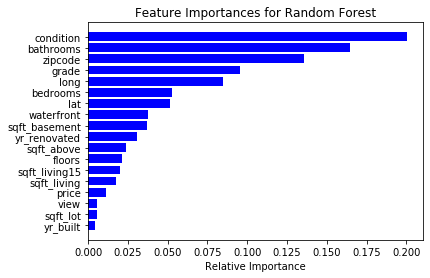

In [19]:
forest_features = data.columns.values.tolist()
importances = forest.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances for Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [forest_features[i] for i in indices])
plt.xlabel('Relative Importance')
sns.set_style('darkgrid')
plt.show()

Now, it's time to Xgboost.

In [20]:
n_estimators = range(10, 400, 10)
max_depth = range(10, 200, 10)
min_child_weight = range(10)
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_child_weight': min_child_weight}

In [21]:
xgbr_tuning = RandomizedSearchCV(estimator = xgbr, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=101, n_jobs = -1)
xgbr_tuning.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 52.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 97.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
            

In [22]:
params = xgbr_tuning.best_params_
print(params)

{'n_estimators': 50, 'min_child_weight': 8, 'max_depth': 10}


In [23]:
xgbr = XGBRegressor(objective = 'reg:squarederror', **params)
xgbr.fit(X_train, y_train)
xgbr_pred = xgbr.predict(X_test)
print('XGBOOST MAE:\t ', round(mean_absolute_error(y_test, xgbr_pred), 2))
print('XGBOOST MSE:\t ', round(mean_squared_error(y_test, xgbr_pred), 2))
print('XGBOOST R2:\t ', round(r2_score(y_test, xgbr_pred), 2))

XGBOOST MAE:	  66327.91
XGBOOST MSE:	  14929157820.86
XGBOOST R2:	  0.89


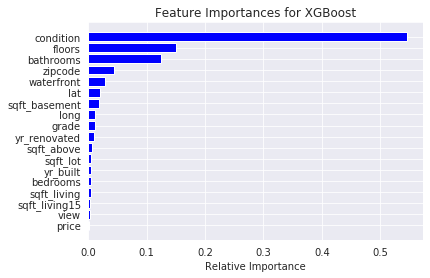

In [24]:
xgbr_features = data.columns.values.tolist()
importances = xgbr.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances for XGBoost')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [xgbr_features[i] for i in indices])
plt.xlabel('Relative Importance')
sns.set_style('darkgrid')
plt.show()